Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


50000
2
torch.Size([3, 224, 224])
truck


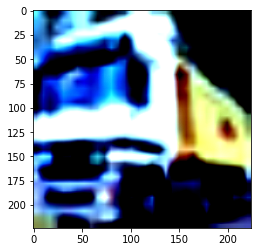

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3, 224, 224])


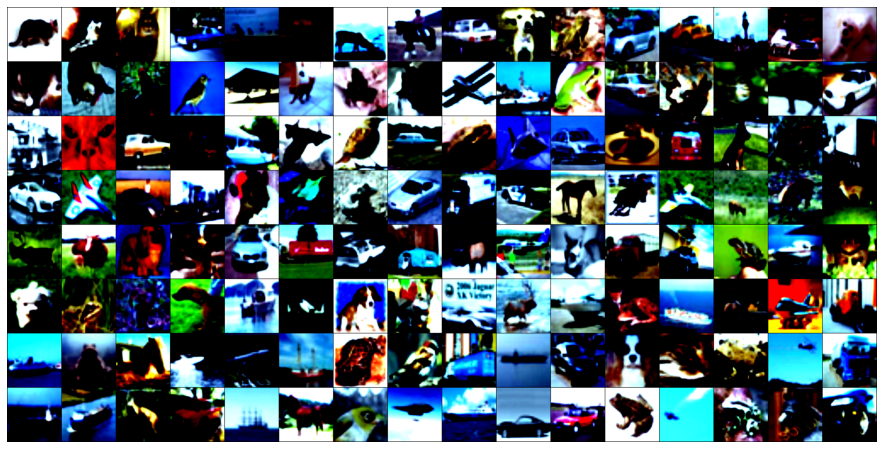

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import time
import os
import torch.backends.cudnn as cudnn

dic = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer',
        5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
start_time = time.time()
batch_size = 128
learning_rate = 0.1

transform = A.Compose([
    A.Resize(224,224),
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.299, 0.224, 0.225],
    ),
    ToTensorV2(),
])

# transform = transforms.Compose([
#     transforms.Resize([224, 224]),    
#     transforms.ToTensor(),
#     transforms.Normalize(mean=(0.4914, 0.4824, 0.4467),
#                           std=(0.2471, 0.2436, 0.2616))
# ])

class CIFAR10_Dataset(datasets.CIFAR10):
    # override
    def __getitem__(self, idx):
        img, label = self.data[idx], self.targets[idx]
        if self.transform is not None:
            img = self.transform(image=img)
        if self.target_transform  is not None:
            target = self.target_transform(image=target)
        return img, label

root = "/home/ljj0512/private/data/cifar-10/"
train_dataset = CIFAR10_Dataset(root=root,
                                train=True,
                                transform=transform)

test_dataset = CIFAR10_Dataset( root=root,
                                train=False,
                                transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=0)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=0)

print(len(train_dataset))
print(len(train_dataset[0]))
print(train_dataset[0][0]["image"].shape)

import matplotlib.pyplot as plt
from torchvision.utils import make_grid
print(dic[train_dataset[1][1]])
plt.imshow(train_dataset[1][0]["image"].permute((1,2,0)))
plt.show()

# for idx, (data, target) in enumerate(train_loader):
#    if idx == 1:
#       break
#    print('**',dic[target[1].item()],'**')
#    plt.imshow(data["image"][1].permute(1,2,0))
#    plt.show()
#    print('data.shape :',data["image"][0].shape) # batch_size, C, H, W
#    print('target.shape :',target.shape)
#    print()


for images, _ in train_loader:
   print('images.shape:', images["image"].shape)
   plt.figure(figsize=(16,8))
   plt.axis('off')
   plt.imshow(make_grid(images["image"], nrow=16).permute((1, 2, 0)))
   break
plt.show()